# Zadatak

**TODO 2**: Napraviti model linearne regresije koji predviđanja stopu smrtnosti od raka kože na osnovu geografske širine koristeći [data/skincancer.csv](data/skincancer.csv). Zatim testirati L.I.N.E. pretpostavke (koristeći funkcije iz **TODO 1**). Zaključiti koje pretpostavke važe  a koje su narušene.

In [1]:
import seaborn as sb
import pandas as pd
import statsmodels.api as sm
sb.set(font_scale=1.)
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

import line_pretpostavke as line

## Učitavanje podataka

In [2]:
df = pd.read_csv('../data/skincancer.csv', sep=',')
x = df['Lat'].values.reshape(-1,1)
y = df['Mort']

## Generisanje modela

In [3]:
 # izračunaj nagib i presek za liniju koja se najbolja uklapa (best fit)

x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()

intercept, slope = model.params

# prediktuj y za svako x
y_pred = model.predict(x_with_const)

## Iscrtavanje modela

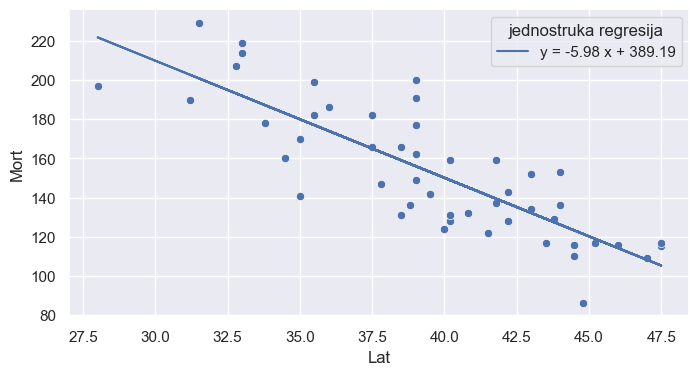

In [4]:
 # plotuj podatke i liniju koja se nabolje uklapa (best fit)
sb.scatterplot(data=df, x='Lat', y='Mort')
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='jednostruka regresija')
plt.show()

## Pretpostavka linearnosti

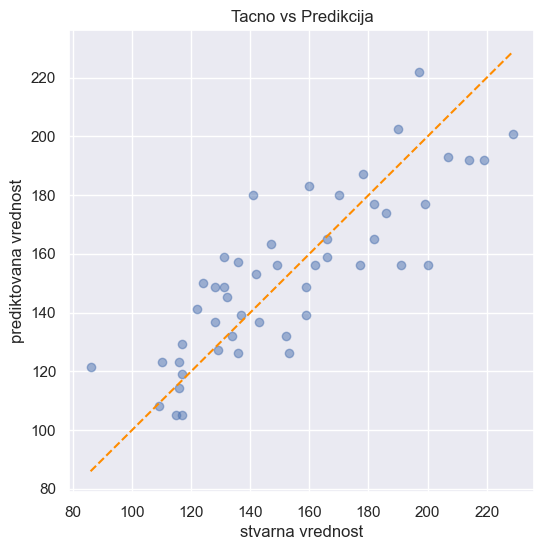

Linearnost važi za p vrednost:  3.309456194395625e-13


In [5]:
is_linear, p_value = line.linear_assumption(model, x_with_const, y)
print("Linearnost važi" if is_linear else "Linearnost NE važi", "za p vrednost: ", p_value)

Linearnost je zadovoljena. ✅

## Pretpostavka nezavisnosti grešaka

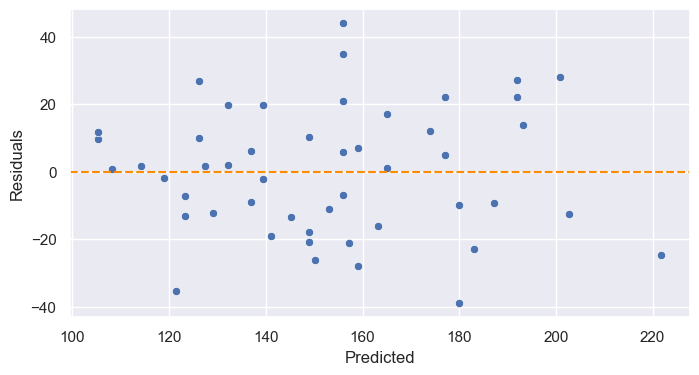

Durbin-Watson: 2.130727752712715
Negativna autokorelacija


In [6]:
kol = line.independence_of_errors_assumption(model, x_with_const, y)
if kol == 0:
    print("Ne postoji autokorelacija")
elif kol > 0:
    print("Pozitivna autokorelacija")
else:
    print("Negativna autokorelacija")

Durbin-Watsonov test je pokazao da postoji negativna autokorelacija podataka tako da pretpostavka NE važi. ❌

## Pretpostavka normalnosti grešaka

Distribucija je normalna


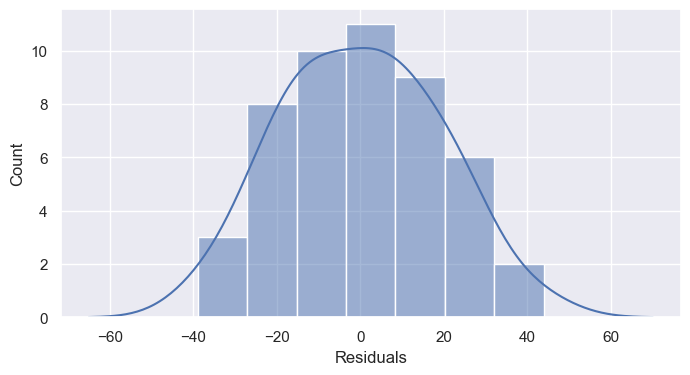

In [7]:
is_normal = line.normality_of_errors_assumption(model, x_with_const, y)

if is_normal:
    print("Distribucija je normalna")
else:
    print("Distribucija nije normalna")

Residuali jesu normalno raspoređeni pa pretpostavka važi. ✅

## Pretpostavka jednake varijanse

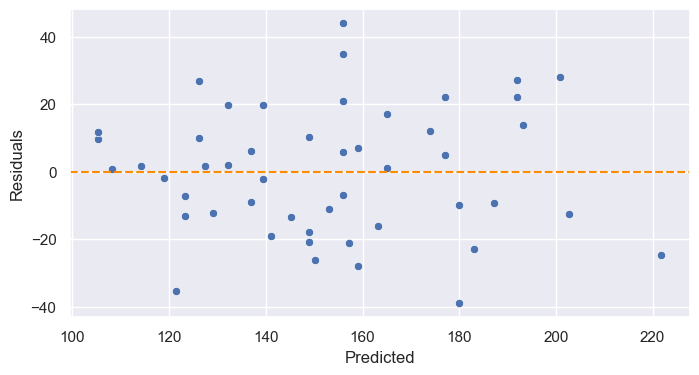

Varijanse su jednake


In [8]:
eq = line.equal_variance_assumption(model, x_with_const, y)

if eq:
    print("Varijanse su jednake")
else:
    print("Varijanse NISU jednake")

Varijanse su jednake pa pretpostavka važi. ✅

## Zaključak

1. Linearnost ✅
2. Nezavnisnost grešaka ❌
3. Normalnost grešaka ✅
4. Jednakost varijanse ✅

Pretpostavka nezavisnosti grešaka nije ispunjenja pa linearna regresija nije dobar model predikcije.